In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import preprocessing as ps
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="Set2")

In [37]:
df=pd.read_csv('../datasets/car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<h3>Data Overview</h3>

In [38]:
ps.dataset_analysis(df,target_column='Selling_Price')


Dataset Shape (Rows & Columns)
Rows :- 301
Columns :- 9
Unique Rows: 299 (99.34%)
Duplicate Rows: 2 (0.66%)

Columns with Null Values and Null Value Counts
No columns contain null values.

Data Type Wise Column Count
object     4
int64      3
float64    2
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : Car_Name, Fuel_Type, Selling_type, Transmission


Discrete Numeric Columns : Owner


Continuous Columns : Year, Selling_Price, Present_Price, Driven_kms


Unknown Columns : -----

Skewness of Numerical Columns
Year: -1.25 -> Strong Negative Skew. Consider transformation (e.g., log or square root)
Selling_Price: 2.49 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
Present_Price: 4.09 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
Driven_kms: 6.44 -> Strong Positive Skew. Consider transformation (e.g., log or square root)

Constant Unique Values in Categorical Columns

Unique Values in Categori

<h3>Data Preproessing & EDA</h3>

In [39]:
df.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

In [40]:
for col in df.select_dtypes(include='object').columns:
    print(f'{col} : {df[col].nunique()}')

Car_Name : 98
Fuel_Type : 3
Selling_type : 2
Transmission : 2


In [45]:
def extractBrandName(name):
    name = name.strip().lower()

    # Standard known brands dictionary (customize as needed)
    brand_keywords = [
        'maruti', 'toyota', 'royal enfield', 'um', 'ktm', 'bajaj', 'hyosung', 'mahindra',
        'honda', 'yamaha', 'tvs', 'hero', 'hyundai'
    ]

    for brand in brand_keywords:
        if name.startswith(brand):
            return brand.title()  # Proper case

    # If not found, return first word as brand fallback
    return name.split()[0].title()


df['Car_Name']=df['Car_Name'].map(lambda x: extractBrandName(x))

In [46]:
df['Car_Name'].nunique()

44

In [47]:
df['Car_Name'].unique()

array(['Ritz', 'Sx4', 'Ciaz', 'Wagon', 'Swift', 'Vitara', 'S', 'Alto',
       'Ertiga', 'Dzire', 'Ignis', '800', 'Baleno', 'Omni', 'Fortuner',
       'Innova', 'Corolla', 'Etios', 'Camry', 'Land', 'Royal Enfield',
       'Um', 'Ktm', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha',
       'Tvs', 'Hero', 'Activa', 'Suzuki', 'I20', 'Grand', 'I10', 'Eon',
       'Xcent', 'Elantra', 'Creta', 'Verna', 'City', 'Brio', 'Amaze',
       'Jazz'], dtype=object)

In [49]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,Ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,Sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,Ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,Wagon,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,Swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
df['Year'].value_counts().index

Index([2015, 2016, 2014, 2017, 2013, 2012, 2011, 2010, 2008, 2009, 2006, 2005,
       2003, 2007, 2018, 2004],
      dtype='int64', name='Year')

In [52]:
df['Fuel_Type'].value_counts().index

Index(['Petrol', 'Diesel', 'CNG'], dtype='object', name='Fuel_Type')

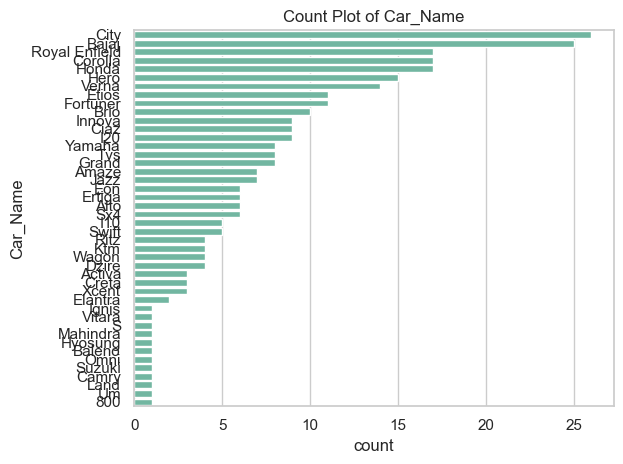

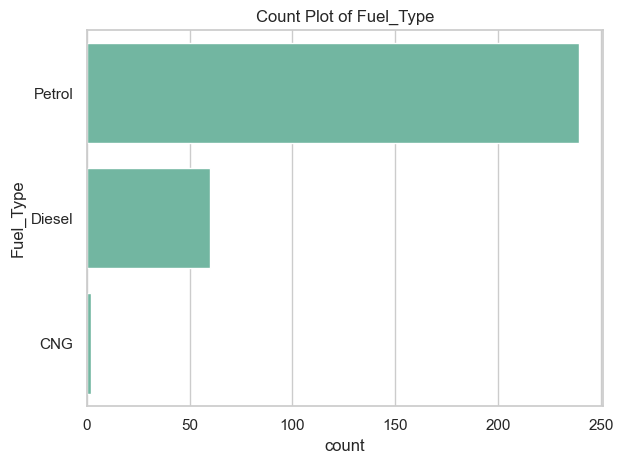

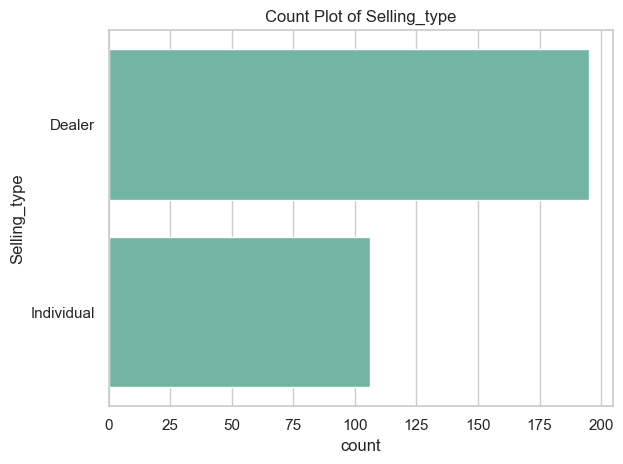

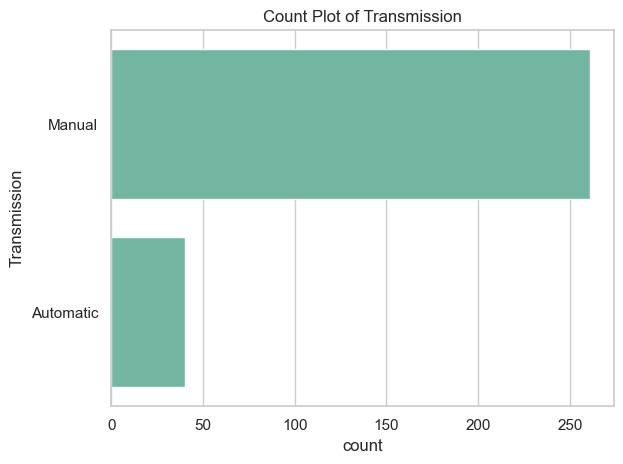

In [53]:
for col in df.select_dtypes(include='object').columns:
    # Get value counts and sort (descending by default)
    sorted_order = df[col].value_counts().index

    # Plot with sorted order
    sns.countplot(data=df, y=col, order=sorted_order)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

In [54]:
df.select_dtypes(include=['float64','int64']).columns


Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')

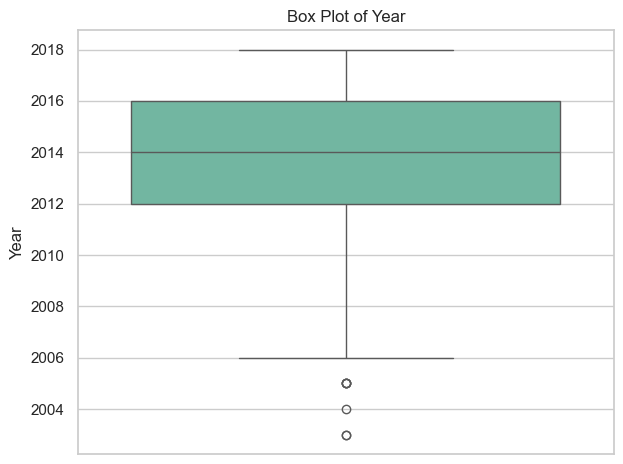

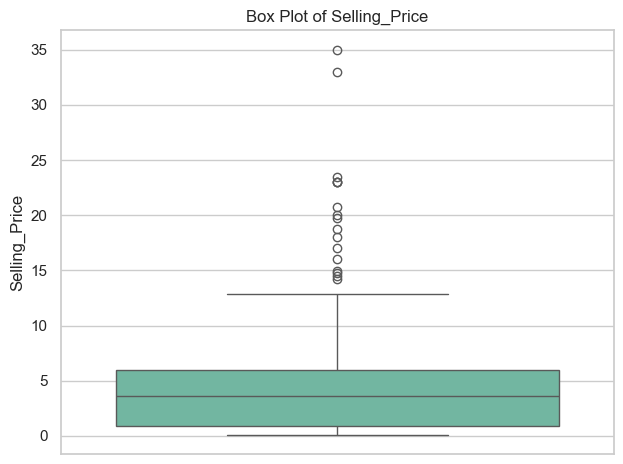

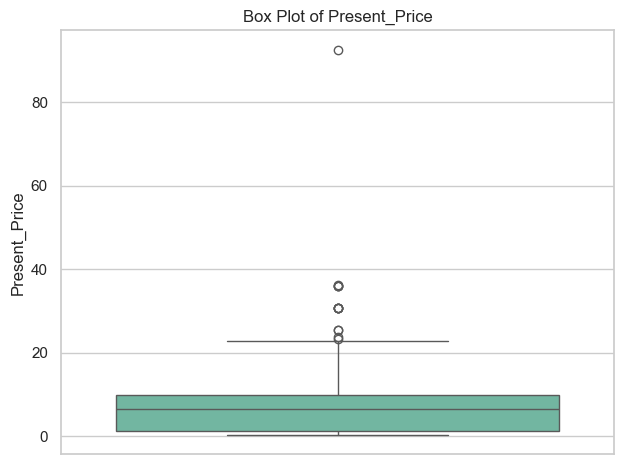

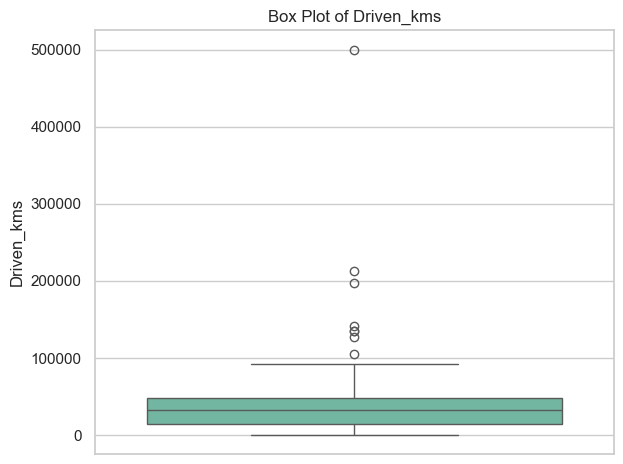

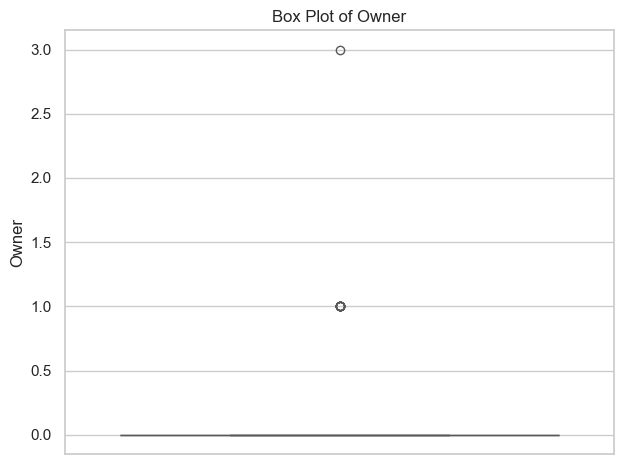

In [55]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

In [56]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,Ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,Sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,Ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,Wagon,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,Swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [62]:
#outlier
print(df[df['Selling_Price']>23].shape)
print(df[df['Present_Price']>40].shape)
print(df[df['Driven_kms']>200000].shape)

(3, 9)
(1, 9)
(2, 9)


In [63]:
df=df[df['Selling_Price']<23]
df[df['Present_Price']<40]
df=df[df['Driven_kms']<200000]

In [64]:
df.shape

(293, 9)

In [65]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,Ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,Sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,Ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,Wagon,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,Swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [66]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i]=encoder.fit_transform(df[i])

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,30,2014,3.35,5.59,27000,2,0,1,0
1,35,2013,4.75,9.54,43000,1,0,1,0
2,8,2017,7.25,9.85,6900,2,0,1,0
3,40,2011,2.85,4.15,5200,2,0,1,0
4,34,2014,4.60,6.87,42450,1,0,1,0


In [67]:
numericalValues=['Selling_Price','Present_Price','Driven_kms']
for i in numericalValues:
    df[i]=np.log1p(df[i]) 


In [68]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,30,2014,1.470176,1.885553,10.203629,2,0,1,0
1,35,2013,1.749200,2.355178,10.668979,1,0,1,0
2,8,2017,2.110213,2.384165,8.839422,2,0,1,0
3,40,2011,1.348073,1.638997,8.556606,2,0,1,0
4,34,2014,1.722767,2.063058,10.656106,1,0,1,0


In [69]:
df.corr()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,1.000000,-0.016450,-0.110285,-0.131438,-0.032765,-0.088024,0.125143,0.060448,-0.063475
Year,-0.016450,1.000000,0.247607,-0.035552,-0.532467,-0.034823,-0.019898,0.020696,-0.185825
Selling_Price,-0.110285,0.247607,1.000000,0.936059,0.231221,-0.447630,-0.834781,-0.173651,-0.103365
Present_Price,-0.131438,-0.035552,0.936059,1.000000,0.413456,-0.413435,-0.853762,-0.198404,-0.014092
Driven_kms,-0.032765,-0.532467,0.231221,0.413456,1.000000,-0.282112,-0.357230,-0.000351,0.080220
Fuel_Type,-0.088024,-0.034823,-0.447630,-0.413435,-0.282112,1.000000,0.336456,0.006920,0.051573
Selling_type,0.125143,-0.019898,-0.834781,-0.853762,-0.357230,0.336456,1.000000,0.046061,0.124750
Transmission,0.060448,0.020696,-0.173651,-0.198404,-0.000351,0.006920,0.046061,1.000000,-0.063383
Owner,-0.063475,-0.185825,-0.103365,-0.014092,0.080220,0.051573,0.124750,-0.063383,1.000000


In [70]:
df.to_csv('../datasets/clean_datasets.csv')